In [172]:
# Import needed libraries
import pandas as pd

# Read the clean data
clean_data = pd.read_csv("datathon/dataset/clean_data.csv")
clean_data.head()

,Unnamed: 0,cod_modelo_color,des_color_specification_esp,des_agrup_color_eng,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename,cod_outfit
0,0,41085800-02,OFFWHITE,WHITE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,datathon/images/2019_41085800_02.jpg,1769
1,1,41085800-02,OFFWHITE,WHITE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,datathon/images/2019_41085800_02.jpg,1396
2,2,41085800-02,OFFWHITE,WHITE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,datathon/images/2019_41085800_02.jpg,683
3,3,53000586-TO,TEJANO OSCURO,BLUE,J-JEANS,Bottoms,Jeans,Jeans,Jeans,datathon/images/2019_53000586_TO.jpg,629
4,4,53000586-TO,TEJANO OSCURO,BLUE,J-JEANS,Bottoms,Jeans,Jeans,Jeans,datathon/images/2019_53000586_TO.jpg,616


In [173]:
from tqdm import tqdm

# Create the training dataset
columns = ['ColorSpecification1', 'Color1', 'Fabric1', 'Category1', 'AggregatedFamily1', 'Family1', 'Type1', 'ColorSpecification2', 'Color2', 'Fabric2', 'Category2', 'AggregatedFamily2', 'Family2', 'Type2', 'Match']
data_model = pd.DataFrame(columns=columns)

cols_clean_data = ['des_color_specification_esp', 'des_agrup_color_eng', 'des_fabric', 'des_product_category', 'des_product_aggregated_family', 'des_product_family', 'des_product_type']

# For each outfit
for code in tqdm(clean_data['cod_outfit'].unique()):
    # Get data of products
    subFrame = clean_data[clean_data['cod_outfit'] == code]
    to_add = []
    i = 0
    for _, row in subFrame.iterrows():
        to_add.append([])
        for col in cols_clean_data:
            to_add[i].append(row[col])
        i += 1
    
    # Combine results and add them to the model data
    combined = []
    for i in range(len(to_add)):
        for j in range(i+1,len(to_add)):
            data_model.loc[len(data_model)] = to_add[i] + to_add[j] + [1]

    

100%|██████████████████████████████████████████████████████████████████████████████████████████| 7800/7800 [26:54<00:00,  4.83it/s]


In [31]:
data_model.to_csv("datathon/dataset/data_model.csv")

In [174]:
data_model

,ColorSpecification1,Color1,Fabric1,Category1,AggregatedFamily1,Family1,Type1,ColorSpecification2,Color2,Fabric2,Category2,AggregatedFamily2,Family2,Type2,Match
0,OFFWHITE,WHITE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,ORO,WHITE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Jewellery,Earrings,1
1,OFFWHITE,WHITE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,ORO,WHITE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Jewellery,Bracelet,1
2,OFFWHITE,WHITE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,ORO,WHITE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Jewellery,Bracelet,1
3,OFFWHITE,WHITE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,NEGRO,GREY,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Bags,Handbag,1
4,OFFWHITE,WHITE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,ARENA,WHITE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Footwear,Shoes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102469,NEGRO,GREY,T-TRICOT,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,GRIS MEDIO VIGORE,GREY,T-TRICOT,Tops,Sweaters and Cardigans,Cardigans,Cardigan,1
102470,NEGRO,GREY,T-TRICOT,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,ORO,WHITE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Jewellery,Earrings,1
102471,NEGRO,GREY,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Footwear,Boots,GRIS MEDIO VIGORE,GREY,T-TRICOT,Tops,Sweaters and Cardigans,Cardigans,Cardigan,1
102472,NEGRO,GREY,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Footwear,Boots,ORO,WHITE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Jewellery,Earrings,1


In [176]:
non_match = 0
rows_to_add = []
for i in tqdm(range(90000)):
    random_rows = clean_data.sample(n = 2)
    if random_rows.iloc[0]['cod_outfit'] != random_rows.iloc[1]['cod_outfit']:
        to_add = []
        for _, row in random_rows.iterrows():
            for col in cols_clean_data:
                to_add.append(row[col])
        rows_to_add.append(to_add + [0])
        
rows_new = pd.DataFrame(rows_to_add, columns = columns)
data_model = data_model.append(rows_new, ignore_index = True)

100%|███████████████████████████████████████████████████████████████████████████████████████| 90000/90000 [05:37<00:00, 266.36it/s]
C:\Users\nacho\AppData\Local\Temp\ipykernel_12000\1881289027.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_model = data_model.append(rows_new, ignore_index = True)


In [177]:
data_model = data_model.sample(frac = 1, random_state = 42)
data_model

,ColorSpecification1,Color1,Fabric1,Category1,AggregatedFamily1,Family1,Type1,ColorSpecification2,Color2,Fabric2,Category2,AggregatedFamily2,Family2,Type2,Match
29544,NEGRO,GREY,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Footwear,Shoes,BEIGE,WHITE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,1
191331,CAMEL,WHITE,P-PLANA,Outerwear,Jackets and Blazers,Blazers,Blazer,KHAKI,BROWN,P-PLANA,Outerwear,Coats and Parkas,Puffer coats,Puffer coat,0
73552,TEJANO OSCURO,BLUE,J-JEANS,Bottoms,Jeans,Jeans,Jeans,ORO,WHITE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Jewellery,Earrings,1
174351,NEGRO,GREY,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Bags,Handbag,PLATA,GREY,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Jewellery,Ring,0
144485,NEGRO,GREY,T-TRICOT,Tops,Sweaters and Cardigans,Sweater,Sweater,NEGRO,GREY,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Footwear,Shoes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,ORO,WHITE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Jewellery,Earrings,ORO,WHITE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Jewellery,Ring,0
103694,CELESTE,BLUE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Bags,Handbag,CAMEL,WHITE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Bags,Totes bag,0
131932,CUERO,BROWN,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Footwear,Sandals,ARENA,WHITE,T-TRICOT,Tops,Tops,Tops,Top,0
146867,BLANCO,WHITE,K-CIRCULAR,Tops,T-shirts,T-shirt,T-Shirt,ORO,WHITE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Jewellery,Necklace,0


In [178]:
data_model.to_csv("datathon/dataset/data_model.csv")
len(data_model.columns)

15

In [2]:
import pandas as pd
data_model = pd.read_csv("datathon/dataset/data_model.csv")
from sklearn.model_selection import train_test_split

# One-hot encode the 'Category' column
data_model_ohe = pd.get_dummies(data_model, columns=['ColorSpecification1', 'Color1', 'Fabric1', 'Category1', 'AggregatedFamily1', 'Family1', 'Type1', 'ColorSpecification2', 'Color2', 'Fabric2', 'Category2', 'AggregatedFamily2', 'Family2', 'Type2'], prefix=['ColorSpecification1', 'Color1', 'Fabric1', 'Category1', 'AggregatedFamily1', 'Family1', 'Type1', 'ColorSpecification2', 'Color2', 'Fabric2', 'Category2', 'AggregatedFamily2', 'Family2', 'Type2'])
data_model_ohe

# Create the training dataset (It is going to be th full dataset)
X_train = data_model_ohe.drop('Match', axis = 1)
Y_train = data_model_ohe['Match']

print(X_train.shape, Y_train.shape)

C:\Users\nacho\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(196638, 523) (196638,)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Create a logistic regression model and fit it using all the data retrieved from the dataset
logreg_model = LogisticRegression(random_state = 42)
logreg_model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [4]:
products = pd.read_csv("datathon/dataset/product_data.csv")

In [5]:
len(data_model_ohe.columns)

524

In [6]:
len(data_model_ohe.columns.unique()), len(data_model_ohe.columns)

(524, 524)

In [7]:
prod_test = products.iloc[65]
prod_test

cod_modelo_color                                          57072516-99
cod_color_code                                                     99
des_color_specification_esp                                     NEGRO
des_agrup_color_eng                                              GREY
des_sex                                                        Female
des_age                                                         Adult
des_line                                                          SHE
des_fabric                                                   T-TRICOT
des_product_category              Dresses, jumpsuits and Complete set
des_product_aggregated_family                   Dresses and jumpsuits
des_product_family                                            Dresses
des_product_type                                                Dress
des_filename                     datathon/images/2023_57072516_99.jpg
Name: 65, dtype: object

In [13]:
import random

des_product_category = ['Bottoms', 'Dresses, jumpsuits and Complete set', 'Tops','Accesories, Swim and Intimate', 'Outerwear']

# Matrix with accepted outfit configurations per given seed product
m_des_product_category = [ [0, 0, 1, 1, 1],
      [0, 0, 0, 1, 1],
      [1, 0, 0, 1, 1],
      [1, 0, 1, 0, 1],
      [1, 0, 1, 1, 0],
    ]

# Only able to select or dress or bottoms + tops. Choose this option randomly
if random.choice([True, False]):
    m_des_product_category[3][0:3] = [0,1,0]
if random.choice([True, False]):
    m_des_product_category[4][0:3] = [0,1,0]

# Dicts to check dimensions of matrix and data in the dataset
ind2 = {value: index for index, value in enumerate(des_product_category)}
ind3 = {index: value for index, value in enumerate(des_product_category)}

# Colors for the data model that will predict matchings
columns = ['ColorSpecification1', 'Color1', 'Fabric1', 'Category1', 'AggregatedFamily1', 'Family1', 'Type1', 'ColorSpecification2', 'Color2', 'Fabric2', 'Category2', 'AggregatedFamily2', 'Family2', 'Type2']
data_model = pd.DataFrame(columns=columns)

# Colors to get info from the products dataset
cols_clean_data = ['des_color_specification_esp', 'des_agrup_color_eng', 'des_fabric', 'des_product_category', 'des_product_aggregated_family', 'des_product_family', 'des_product_type']

# Merge two rows to return the row that fits the predicting dataset
def compute_row(prod1, prod2):
    prod1_list = []
    prod2_list = []
    for col in cols_clean_data:
        prod1_list.append(prod1[col])
        prod2_list.append(prod2[col])
        
    return prod1_list + prod2_list  

# Make outfit prediction
outfit_prediction = []
for index, col in enumerate(m_des_product_category[ind2[prod_test['des_product_category']]]): # recorre los 1s de la fila
    if col == 1: # accedim a la posició de la matriu
        X_test = pd.DataFrame(columns = columns) # data frame de files prod_test amb totes els 'tops', per ex
        X_test_index = []
        for index, prod in products[products['des_product_category'] == ind3[index]].iterrows():
            X_test.loc[len(X_test)] = compute_row(prod_test, prod)
            X_test_index.append(prod['des_filename'])
        
        X_test = pd.get_dummies(X_test, columns=['ColorSpecification1', 'Color1', 'Fabric1', 'Category1', 'AggregatedFamily1', 'Family1', 'Type1', 'ColorSpecification2', 'Color2', 'Fabric2', 'Category2', 'AggregatedFamily2', 'Family2', 'Type2'], prefix=['ColorSpecification1', 'Color1', 'Fabric1', 'Category1', 'AggregatedFamily1', 'Family1', 'Type1', 'ColorSpecification2', 'Color2', 'Fabric2', 'Category2', 'AggregatedFamily2', 'Family2', 'Type2'])
        missing_columns = set(data_model_ohe.columns) - set(X_test.columns)
        
        # Add missing columns to X_test
        for col in missing_columns:
            X_test[col] = 0

        # Reorder columns in X_test
        X_test = X_test[data_model_ohe.columns]
        # Separate features and target variable in X_test
        X_test = X_test.drop(['Match'], axis=1)

        print(logreg_model.predict_proba(X_test))
        
        result = [(X_test_index[i], prediction[i]) for i in range(len(prediction))]
        sorted_result = sorted(result, key=lambda x: x[1][1], reverse=True)
        
        outfit_prediction.append(sorted_result[0][0])

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 ...
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\nacho\AppData\Local\Temp\ipykernel_13164\2791407115.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 ...
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


['datathon/images/2023_47045866_99.jpg', 'datathon/images/2019_57055941_94.jpg']


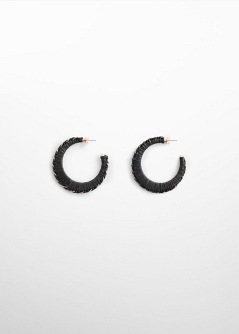

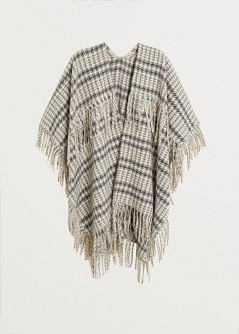

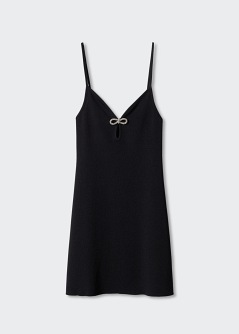

In [9]:
from PIL import Image
print(outfit_prediction)

def visualizeOutfit(list_products: list) -> None:
    for prod in list_products:
        product = Image.open(prod)
        display(product)

visualizeOutfit(outfit_prediction + [prod_test['des_filename']])

In [11]:
print(prediction)

[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 ...
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


In [231]:
outfit_prediction

['datathon/images/2019_53085778_99.jpg',
 'datathon/images/2019_57055941_94.jpg']